<a href="https://colab.research.google.com/github/dayquispe/imersao-dados-python-alura/blob/main/Imers%C3%A3o_dados_com_Python_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import pandas as pd

In [216]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [217]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [219]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [220]:
df.shape

(133349, 11)

In [221]:
linhas, colunas = df.shape
print(f"Linhas: {linhas}\nColunas: {colunas}")

Linhas: 133349
Colunas: 11


In [222]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [223]:
novos_nomes_colunas_map = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'taxa_remoto',
    'company_location': 'localizacao_empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=novos_nomes_colunas_map, inplace=True)

df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [224]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [225]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [226]:
df["taxa_remoto"].value_counts()

,count
taxa_remoto,
0,105312
100,27718
50,319


In [227]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [228]:
traducao_senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(traducao_senioridade)

df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [229]:
traducao_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Tempo Parcial',
    'FL': 'Freelancer'
}

df['contrato'] = df['contrato'].replace(traducao_contrato)

display(df['contrato'].value_counts())

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [230]:
traducao_tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(traducao_tamanho_empresa)

display(df['tamanho_empresa'].value_counts())

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [231]:
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['taxa_remoto'] = df['taxa_remoto'].replace(remoto)

display(df['taxa_remoto'].value_counts())

,count
taxa_remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [232]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [233]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [234]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [235]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [236]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [237]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
taxa_remoto,0
localizacao_empresa,0


In [238]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [239]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [240]:
import numpy as np

#Criação de um DataFrame de teste para usar de exemplo.
df_salarios = pd.DataFrame({
    "nome": ["Ana", "Breno", "Carlos", "Dayana", "valriana"],
    "salario": [4000, np.nan, 5000, np.nan, 200000]
})

#calcula a média salarial e substitui os números pela média e arredonda os valores.
df_salarios["salario_media"] = df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2))

#calcula a mediana e substitui os nulos pela mediana
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(df_salarios["salario"].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Breno,NaN,69666.67,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Dayana,NaN,69666.67,5000.0
4,valriana,200000.0,200000.00,200000.0


In [241]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27],
})

df_temperaturas["preenchido_ffill"] = df_temperaturas["Temperatura"].ffill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [242]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27],
})

df_temperaturas["preenchido_bfill"] = df_temperaturas["Temperatura"].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_bfill
0,Segunda,30.0,30.0
1,Terça,NaN,28.0
2,Quarta,NaN,28.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [243]:
df_cidades = pd.DataFrame({
    "nome": ["Ana", "Breno", "Carlos", "Dayana", "valriana"],
    "cidade": ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades["cidade_preenchida"] = df_cidades["cidade"].fillna("Não informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Breno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Dayana,NaN,Não informado
4,valriana,Belém,Belém


In [244]:
df_limpo = df.dropna()

In [245]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
taxa_remoto,0
localizacao_empresa,0


In [246]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [247]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  133339 non-null  float64
 1   senioridade          133339 non-null  object 
 2   contrato             133339 non-null  object 
 3   cargo                133339 non-null  object 
 4   salario              133339 non-null  int64  
 5   moeda                133339 non-null  object 
 6   usd                  133339 non-null  int64  
 7   residencia           133339 non-null  object 
 8   taxa_remoto          133339 non-null  object 
 9   localizacao_empresa  133339 non-null  object 
 10  tamanho_empresa      133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [248]:
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("int64"))

In [249]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ano                  133339 non-null  int64 
 1   senioridade          133339 non-null  object
 2   contrato             133339 non-null  object
 3   cargo                133339 non-null  object
 4   salario              133339 non-null  int64 
 5   moeda                133339 non-null  object
 6   usd                  133339 non-null  int64 
 7   residencia           133339 non-null  object
 8   taxa_remoto          133339 non-null  object
 9   localizacao_empresa  133339 non-null  object
 10  tamanho_empresa      133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula 3 - Visualização de Dados

Aprendendo a criar gráficos estatísticos para explorar e comunicar informações presentes nos dados Histogramas, boxplot, barras, etc.

In [250]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

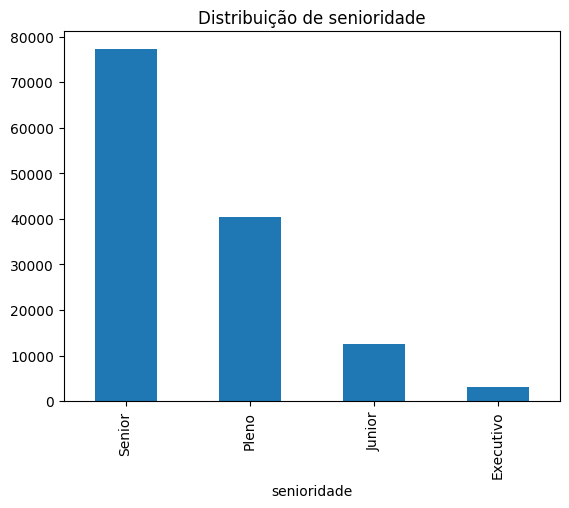

In [251]:
df_limpo["senioridade"].value_counts().plot(kind='bar', title="Distribuição de senioridade")

In [252]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

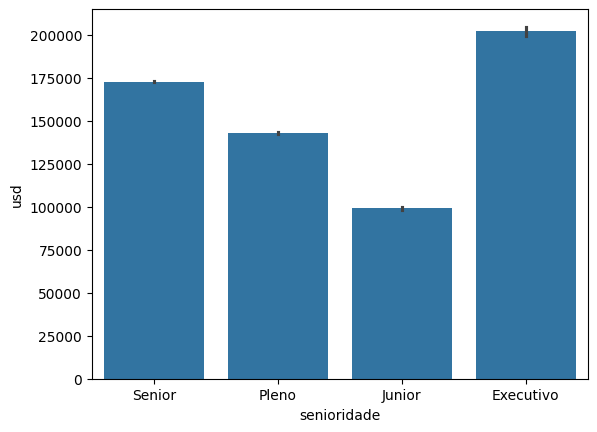

In [253]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [254]:
# Usar o matplotlib junto com o saeborn

import matplotlib.pyplot as plt

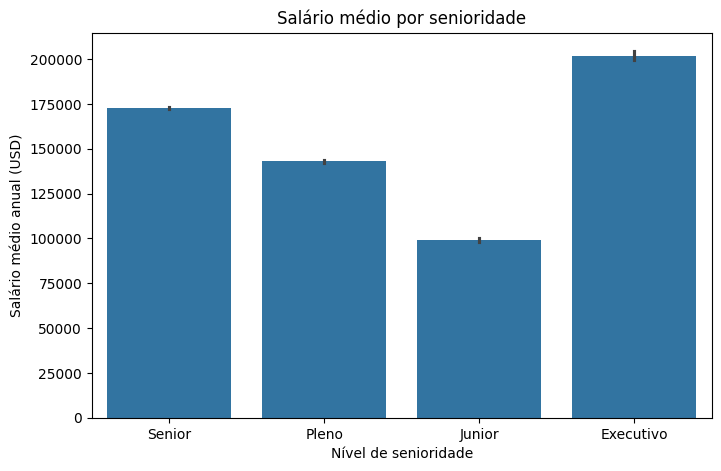

In [255]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Salário médio por senioridade")
plt.xlabel("Nível de senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

In [256]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [257]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index

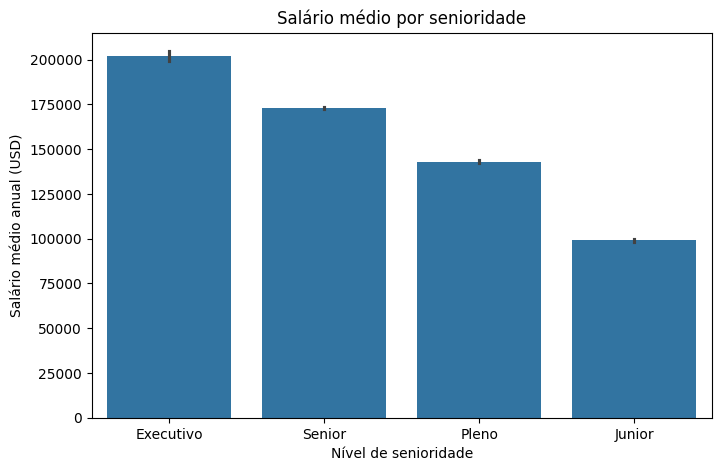

In [258]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd", order=ordem)
plt.title("Salário médio por senioridade")
plt.xlabel("Nível de senioridade")
plt.ylabel("Salário médio anual (USD)")
plt.show()

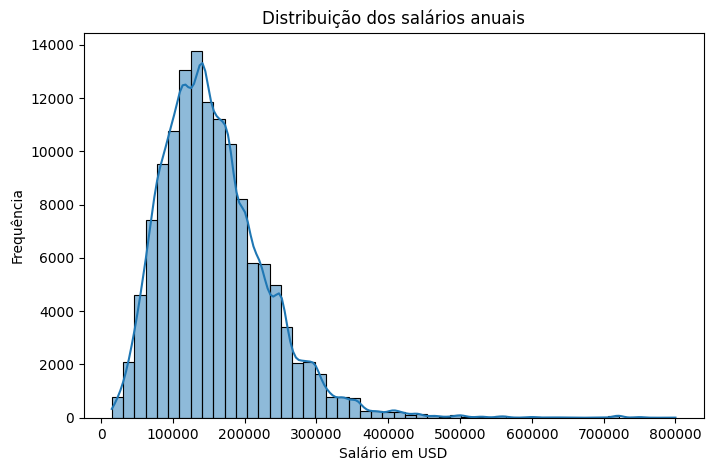

In [259]:
plt.figure(figsize=(8,5))
sns.histplot(df_limpo["usd"], bins=50, kde=True) #bins=50, os valores vão indo de 50 em 50
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()

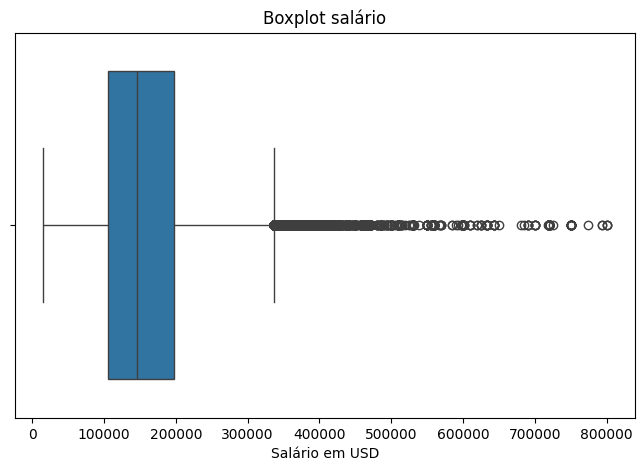

In [260]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo["usd"])
plt.title("Boxplot salário")
plt.xlabel("Salário em USD")
plt.show()

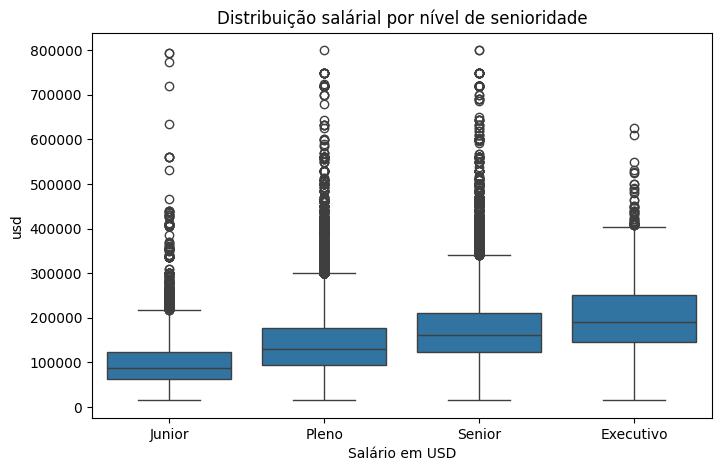

In [261]:
ordem_senioridade = ["Junior", "Pleno", "Senior", "Executivo"]

plt.figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade)
plt.title("Distribuição salárial por nível de senioridade")
plt.xlabel("Salário em USD")
plt.show()

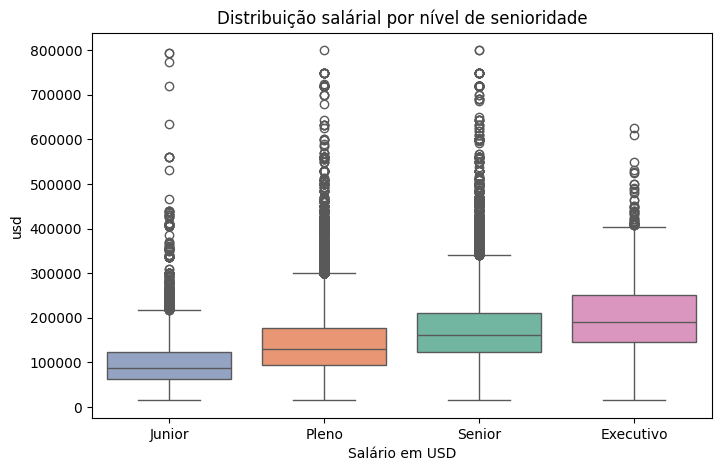

In [262]:
ordem_senioridade = ["Junior", "Pleno", "Senior", "Executivo"]

plt.figure(figsize=(8,5))
sns.boxplot(x="senioridade", y="usd", data=df_limpo, order=ordem_senioridade, palette="Set2", hue="senioridade")
plt.title("Distribuição salárial por nível de senioridade")
plt.xlabel("Salário em USD")
plt.show()

### Gráficos dinâmicos

In [263]:
import plotly.express as px

In [264]:
senioridade_media_salario = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x="senioridade",
             y="usd",
             title="Mádia Salarial por Senioridade",
             labels= {"senioridade": "Nível de Senioriade", "usd": "Média Salarial Anual (usd)"})

fig.show()

In [265]:
remoto_contagem = df_limpo["taxa_remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]

In [266]:
fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Proporção dos tipos de trabalho"
)

fig.show()

In [267]:
fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Proporção dos tipos de trabalho",
             hole=0.5
)

fig.show()

In [268]:
fig = px.pie(remoto_contagem,
             names="tipo_trabalho",
             values="quantidade",
             title="Proporção dos tipos de trabalho",
             hole=0.5
)

fig.update_traces(textinfo="percent+label")
fig.show()

In [269]:
# Filtrando salário médio por pais, apenas do cargo de cientista de dados.
df_cientista_dados = df_limpo[df_limpo['cargo'] == 'Data Scientist']
display(df_cientista_dados.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa
6,2025,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Médio
7,2025,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Médio
8,2025,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Médio
9,2025,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Médio
65,2025,Senior,Tempo Integral,Data Scientist,258000,USD,258000,US,Presencial,US,Médio


In [270]:
pais_media_salario = df_cientista_dados.groupby("residencia")["usd"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(pais_media_salario,
             x="residencia",
             y="usd",
             title="Mádia Salarial por país",
             labels= {"resisdência": "resisdência do cientista de dados", "usd": "Média Salarial Anual (usd)"})

fig.show()

In [271]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 17.8 MB/s eta 0:00:00


In [274]:
import pycountry

# Função para converter ISO-2 para ISO-3

def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3

    except:
        return None


# Criar nova coluna com código ISO-3
df_limpo["residencia_iso3"] = df_limpo['residencia'].apply(iso2_to_iso3)

#Calcular media salarial por pais (ISO-3)
df_ds = df_limpo[df_limpo["cargo"] == "Data Scientist"]
medidas_ds_pais = df_ds.groupby("residencia_iso3")["usd"].mean().reset_index()

#Gerar o mapa
fig = px.choropleth(medidas_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale="rdylgn",
                    title="Salário médio de Cientistas de dados por país",
                    labels={"usd":"Salário médio (USD)", "residencia_iso3": "País"})

fig.show()

In [278]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,taxa_remoto,localizacao_empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [281]:
df_limpo.to_csv("dados-imersao-final.csv", index=False)